In [1]:
import os
os.chdir('../../..')

In [2]:
import convokit
from convokit import TensorDecomposer, HyperConvo, Corpus
import numpy as np
import pandas as pd

In [3]:
# CORPUS_DIR = "convokit/thread_generator/fake-corpus-trajectory"
CORPUS_DIR = "convokit/thread_generator/annotated-fake-trajectory"

In [4]:
corpus = Corpus(CORPUS_DIR)

## Standard TCA

In [29]:
hyperconv_range = range(3, 20+1)

In [6]:
td = TensorDecomposer(obj_type="conversation",
                      feature_set=["hyperconvo-{}".format(i) for i in hyperconv_range],
                      group_func=lambda convo: convo.get_utterance(convo.id).meta['subreddit'],
                      rank=3
                     )

In [7]:
td.fit(corpus)

Constructing tensor...Done.
Decomposing tensor...Done.


Directory already exists. Exiting summarize()


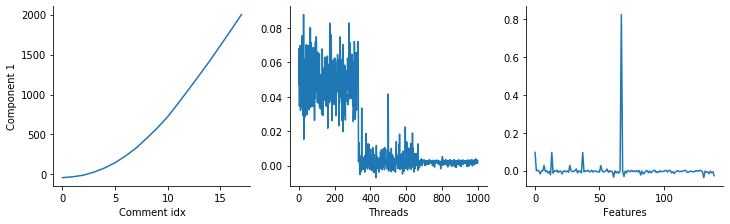

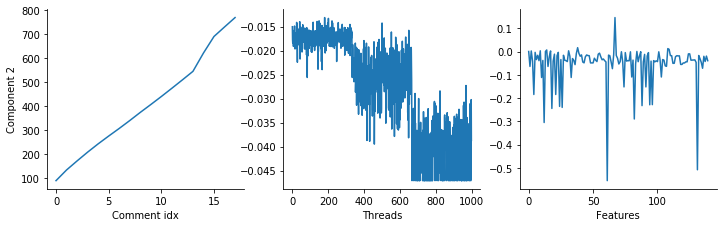

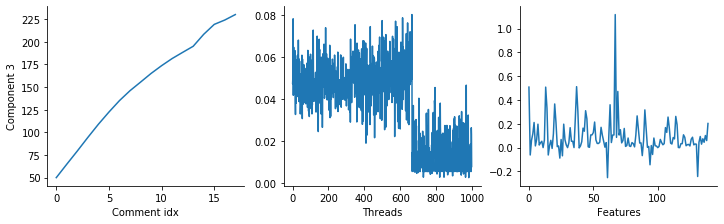

In [8]:
td.summarize(corpus, axis_names=["Comment idx", "Threads", "Features"], 
             output_dir='convokit/tensor_decomposer/reports/25May_normal', 
             report_title="25 May (normal)")

In [9]:
td.purity(n_clusters=3)

0.963963963963964

## Non-negative TCA (HALS)

In [46]:
td_nonneg_hals = TensorDecomposer(obj_type="conversation",
                      feature_set=["hyperconvo-{}".format(i) for i in hyperconv_range],
                      group_func=lambda convo: convo.get_utterance(convo.id).meta['subreddit'],
                      rank=3, tensor_func='tensortools-ncp-hals',
                      anomaly_threshold=2,
                     )

In [47]:
td_nonneg_hals.fit(corpus)

Constructing tensor...Done.
Decomposing tensor...NCP_HALS: iteration 1, objective 0.6335493022535422, improvement inf.
NCP_HALS: iteration 2, objective 0.3056238006766906, improvement 0.32792550157685163.
NCP_HALS: iteration 3, objective 0.3000014142392119, improvement 0.005622386437478699.
NCP_HALS: iteration 4, objective 0.2984082481186748, improvement 0.001593166120537115.
NCP_HALS: iteration 5, objective 0.29733999541104256, improvement 0.0010682527076322224.
NCP_HALS: iteration 6, objective 0.2965774621058898, improvement 0.0007625333051527461.
NCP_HALS: iteration 7, objective 0.2960397255655797, improvement 0.0005377365403100853.
NCP_HALS: iteration 8, objective 0.29566914489388635, improvement 0.00037058067169337683.
NCP_HALS: iteration 9, objective 0.29540301202008856, improvement 0.0002661328737977864.
NCP_HALS: iteration 10, objective 0.29520914816191124, improvement 0.00019386385817732332.
NCP_HALS: iteration 11, objective 0.2950627903040911, improvement 0.000146357857820134

Report generated at convokit/tensor_decomposer/reports/26May_nonneg_hals/report.html


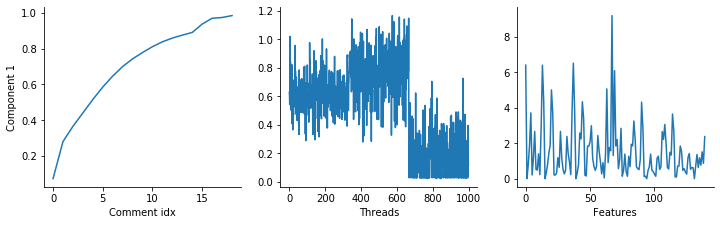

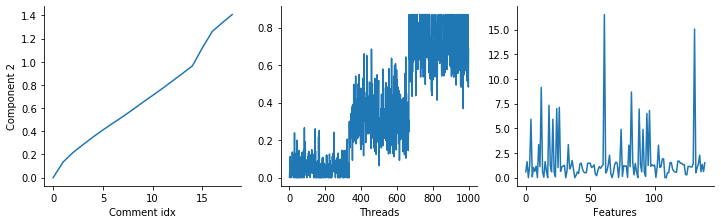

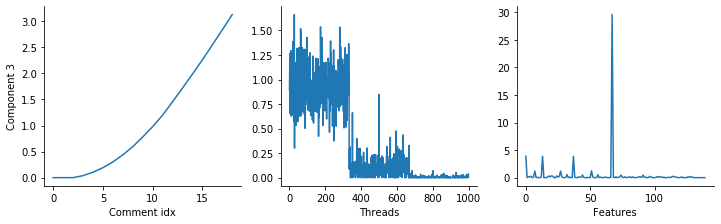

In [48]:
td_nonneg_hals.summarize(corpus, axis_names=["Comment idx", "Threads", "Features"], 
             output_dir='convokit/tensor_decomposer/reports/26May_nonneg_hals', 
             report_title="26 May (non-negative, HALS)")

In [28]:
td_nonneg_hals.purity(n_clusters=3)

0.9619619619619619

## Non-negative TCA (BCD)

In [43]:
td_nonneg_bcd = TensorDecomposer(obj_type="conversation",
                      feature_set=["hyperconvo-{}".format(i) for i in hyperconv_range],
                      group_func=lambda convo: convo.get_utterance(convo.id).meta['subreddit'],
                      rank=3, tensor_func='tensortools-ncp-bcd',
                      anomaly_threshold=2,
                     )

In [44]:
td_nonneg_bcd.fit(corpus)

Constructing tensor...Done.
Decomposing tensor...NCP_BCD: iteration 1, objective 0.7268605614738717, improvement inf.
NCP_BCD: iteration 2, objective 0.5671511747940163, improvement 0.15970938667985535.
NCP_BCD: iteration 3, objective 0.5337347784437557, improvement 0.03341639635026061.
NCP_BCD: iteration 4, objective 0.5227252670603235, improvement 0.011009511383432202.
NCP_BCD: iteration 5, objective 0.5080969525711816, improvement 0.014628314489141925.
NCP_BCD: iteration 6, objective 0.4771224035776244, improvement 0.03097454899355717.
NCP_BCD: iteration 7, objective 0.42340542620025884, improvement 0.05371697737736558.
NCP_BCD: iteration 8, objective 0.36929610917055516, improvement 0.054109317029703674.
NCP_BCD: iteration 9, objective 0.3461738348713987, improvement 0.023122274299156476.
NCP_BCD: iteration 10, objective 0.3356107302943991, improvement 0.010563104576999605.
NCP_BCD: iteration 11, objective 0.3286432106241158, improvement 0.006967519670283306.
NCP_BCD: iteration 12,

Report generated at convokit/tensor_decomposer/reports/26May_nonneg_bcd/report.html


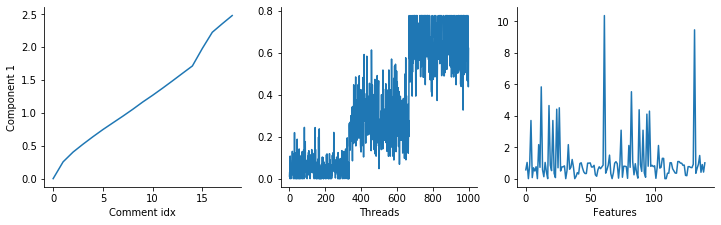

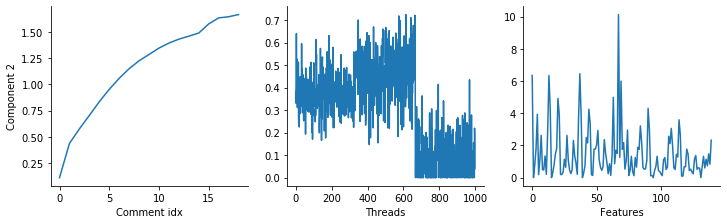

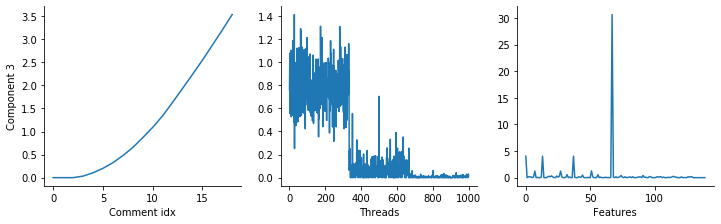

In [45]:
td_nonneg_bcd.summarize(corpus, axis_names=["Comment idx", "Threads", "Features"], 
             output_dir='convokit/tensor_decomposer/reports/26May_nonneg_bcd', 
             report_title="26 May (non-negative, BCD)")

In [23]:
td_nonneg_bcd.purity(n_clusters=3)

0.9619619619619619

## Non-negative, standard-scaled

In [30]:
from sklearn.preprocessing import StandardScaler
def standard_scale(tensor):
    tensor = tensor.copy()
    for i in range(tensor.shape[2]):
        tensor[:, :, i] = StandardScaler().fit_transform(tensor[:, :, i])
    return tensor

### HALS, 3-20, standard-scaled

In [32]:
td_nonneg_hals_std = TensorDecomposer(obj_type="conversation",
                      feature_set=["hyperconvo-{}".format(i) for i in hyperconv_range],
                      group_func=lambda convo: convo.get_utterance(convo.id).meta['subreddit'],
                      rank=3, tensor_func='tensortools-ncp-hals',
                      normalize_func=standard_scale
                     )
td_nonneg_hals_std.fit(corpus)
td_nonneg_hals_std.purity(n_clusters=3)

Constructing tensor...Done.
Decomposing tensor...NCP_HALS: iteration 1, objective 0.9304985080154515, improvement inf.
NCP_HALS: iteration 2, objective 0.9226273427131975, improvement 0.007871165302254068.
NCP_HALS: iteration 3, objective 0.9217997514051484, improvement 0.0008275913080491026.
NCP_HALS: iteration 4, objective 0.9215729852178874, improvement 0.00022676618726091835.
NCP_HALS: iteration 5, objective 0.9213992629583504, improvement 0.0001737222595370458.
NCP_HALS: iteration 6, objective 0.9212223811119677, improvement 0.00017688184638264826.
NCP_HALS: iteration 7, objective 0.9210426883422578, improvement 0.0001796927697099715.
NCP_HALS: iteration 8, objective 0.9208984450939091, improvement 0.00014424324834871882.
NCP_HALS: iteration 9, objective 0.9208167101191385, improvement 8.173497477059755e-05.
NCP_HALS: iteration 10, objective 0.9207774205855187, improvement 3.92895336197574e-05.
NCP_HALS: iteration 11, objective 0.9207600403741005, improvement 1.738021141817203e-05

0.6666666666666666

### HALS, 2-20, standard-scaled

In [36]:
hyperconv_range=range(2,20+1)
td_nonneg_hals_std = TensorDecomposer(obj_type="conversation",
                      feature_set=["hyperconvo-{}".format(i) for i in hyperconv_range],
                      group_func=lambda convo: convo.get_utterance(convo.id).meta['subreddit'],
                      rank=3, tensor_func='tensortools-ncp-hals',
                      normalize_func=standard_scale
                     )
td_nonneg_hals_std.fit(corpus)
td_nonneg_hals_std.purity(n_clusters=3)

Constructing tensor...Done.
Decomposing tensor...NCP_HALS: iteration 1, objective 0.931505308912612, improvement inf.
NCP_HALS: iteration 2, objective 0.9251176389900293, improvement 0.006387669922582662.
NCP_HALS: iteration 3, objective 0.9238353020244865, improvement 0.0012823369655428074.
NCP_HALS: iteration 4, objective 0.9234168126352242, improvement 0.00041848938926225543.
NCP_HALS: iteration 5, objective 0.9232543431897797, improvement 0.00016246944544451303.
NCP_HALS: iteration 6, objective 0.9231722282226771, improvement 8.211496710264221e-05.
NCP_HALS: iteration 7, objective 0.9231078653422299, improvement 6.436288044719962e-05.
NCP_HALS: iteration 8, objective 0.9230469848458382, improvement 6.08804963916354e-05.
NCP_HALS: iteration 9, objective 0.9229918336981424, improvement 5.515114769583107e-05.
NCP_HALS: iteration 10, objective 0.9229401319862026, improvement 5.17017119398e-05.
NCP_HALS: iteration 11, objective 0.9228911164741385, improvement 4.901551206415444e-05.
NCP_

0.7147147147147147

### BCD, 3-20, standard-scaled

In [35]:
hyperconv_range=range(3, 21)
td_nonneg_bcd_std = TensorDecomposer(obj_type="conversation",
                      feature_set=["hyperconvo-{}".format(i) for i in hyperconv_range],
                      group_func=lambda convo: convo.get_utterance(convo.id).meta['subreddit'],
                      rank=3, tensor_func='tensortools-ncp-bcd',
                      normalize_func=standard_scale
                     )
td_nonneg_bcd_std.fit(corpus)
td_nonneg_bcd_std.purity(n_clusters=3)

Constructing tensor...Done.
Decomposing tensor...NCP_BCD: iteration 1, objective 0.9509464620222066, improvement inf.
NCP_BCD: iteration 2, objective 0.9348033817991384, improvement 0.016143080223068207.
NCP_BCD: iteration 3, objective 0.9325507430141213, improvement 0.002252638785017025.
NCP_BCD: iteration 4, objective 0.9318443327986828, improvement 0.000706410215438491.
NCP_BCD: iteration 5, objective 0.9312107903297082, improvement 0.0006335424689746239.
NCP_BCD: iteration 6, objective 0.9305057988519395, improvement 0.0007049914777687016.
NCP_BCD: iteration 7, objective 0.9296426123986823, improvement 0.0008631864532572253.
NCP_BCD: iteration 8, objective 0.928656551492877, improvement 0.0009860609058053305.
NCP_BCD: iteration 9, objective 0.9277062048770089, improvement 0.0009503466158680141.
NCP_BCD: iteration 10, objective 0.9269420882449401, improvement 0.0007641166320688786.
NCP_BCD: iteration 11, objective 0.9263915691157703, improvement 0.000550519129169813.
NCP_BCD: iterat

0.6936936936936937

## Min-max normalization

In [37]:
import numpy as np
def _min_max_scale(mat):
    max_ = np.max(mat)
    min_ = np.min(mat)
    return (mat - min_) / (max_ - min_)

def minmax_normalize(tensor):
    tensor = tensor.copy()
    for i in range(tensor.shape[2]):
        tensor[:, :, i] = _min_max_scale(tensor[:, :, i])
    return tensor

### 3-20, MM, HALS

In [38]:
hyperconv_range=range(3, 21)
td_nonneg_hals_mm = TensorDecomposer(obj_type="conversation",
                      feature_set=["hyperconvo-{}".format(i) for i in hyperconv_range],
                      group_func=lambda convo: convo.get_utterance(convo.id).meta['subreddit'],
                      rank=3, tensor_func='tensortools-ncp-hals',
                      normalize_func=minmax_normalize
                     )
td_nonneg_hals_mm.fit(corpus)
td_nonneg_hals_mm.purity(n_clusters=3)

Constructing tensor...Done.
Decomposing tensor...NCP_HALS: iteration 1, objective 0.4515145617632138, improvement inf.
NCP_HALS: iteration 2, objective 0.3906739002321594, improvement 0.060840661531054385.
NCP_HALS: iteration 3, objective 0.3395891184970956, improvement 0.05108478173506381.
NCP_HALS: iteration 4, objective 0.33622984524170496, improvement 0.003359273255390649.
NCP_HALS: iteration 5, objective 0.33510910792434834, improvement 0.0011207373173566237.
NCP_HALS: iteration 6, objective 0.33443883936759106, improvement 0.0006702685567572808.
NCP_HALS: iteration 7, objective 0.3340168950766994, improvement 0.00042194429089165153.
NCP_HALS: iteration 8, objective 0.3338008548305333, improvement 0.00021604024616611595.
NCP_HALS: iteration 9, objective 0.3336809093447215, improvement 0.00011994548581178988.
NCP_HALS: iteration 10, objective 0.3336067700071211, improvement 7.413933760042068e-05.
NCP_HALS: iteration 11, objective 0.33355711384063097, improvement 4.965616649010851e-

0.9129129129129129

### 2-20, MM, HALS

In [39]:
hyperconv_range=range(2, 21)
td_nonneg_hals_mm = TensorDecomposer(obj_type="conversation",
                      feature_set=["hyperconvo-{}".format(i) for i in hyperconv_range],
                      group_func=lambda convo: convo.get_utterance(convo.id).meta['subreddit'],
                      rank=3, tensor_func='tensortools-ncp-hals',
                      normalize_func=minmax_normalize
                     )
td_nonneg_hals_mm.fit(corpus)
td_nonneg_hals_mm.purity(n_clusters=3)

Constructing tensor...Done.
Decomposing tensor...NCP_HALS: iteration 1, objective 0.4384497099784633, improvement inf.
NCP_HALS: iteration 2, objective 0.35739561279307447, improvement 0.08105409718538881.
NCP_HALS: iteration 3, objective 0.3346990564009946, improvement 0.022696556392079847.
NCP_HALS: iteration 4, objective 0.3322643416740399, improvement 0.002434714726954723.
NCP_HALS: iteration 5, objective 0.33122296838723564, improvement 0.0010413732868042591.
NCP_HALS: iteration 6, objective 0.3305346191625299, improvement 0.000688349224705731.
NCP_HALS: iteration 7, objective 0.3299653421718506, improvement 0.0005692769906793238.
NCP_HALS: iteration 8, objective 0.32945906344671005, improvement 0.0005062787251405299.
NCP_HALS: iteration 9, objective 0.32903316910373503, improvement 0.0004258943429750195.
NCP_HALS: iteration 10, objective 0.32871546419359976, improvement 0.0003177049101352747.
NCP_HALS: iteration 11, objective 0.3284855808889731, improvement 0.00022988330462664353

0.8988988988988988

### 3-20, MM, BCD

In [41]:
hyperconv_range=range(3, 21)
td_nonneg_bcd_mm = TensorDecomposer(obj_type="conversation",
                      feature_set=["hyperconvo-{}".format(i) for i in hyperconv_range],
                      group_func=lambda convo: convo.get_utterance(convo.id).meta['subreddit'],
                      rank=3, tensor_func='tensortools-ncp-bcd',
                      normalize_func=minmax_normalize
                     )
td_nonneg_bcd_mm.fit(corpus)
td_nonneg_bcd_mm.purity(n_clusters=3)

Constructing tensor...Done.
Decomposing tensor...NCP_BCD: iteration 1, objective 0.46985852714423987, improvement inf.
NCP_BCD: iteration 2, objective 0.45426530634573103, improvement 0.015593220798508833.
NCP_BCD: iteration 3, objective 0.4466866057003723, improvement 0.00757870064535876.
NCP_BCD: iteration 4, objective 0.4415964156538022, improvement 0.0050901900465700756.
NCP_BCD: iteration 5, objective 0.4371104468488791, improvement 0.0044859688049230795.
NCP_BCD: iteration 6, objective 0.43156030218937896, improvement 0.005550144659500156.
NCP_BCD: iteration 7, objective 0.42347791424377507, improvement 0.008082387945603897.
NCP_BCD: iteration 8, objective 0.41304732162706476, improvement 0.01043059261671031.
NCP_BCD: iteration 9, objective 0.40464192755390305, improvement 0.00840539407316171.
NCP_BCD: iteration 10, objective 0.40007391998371433, improvement 0.004568007570188715.
NCP_BCD: iteration 11, objective 0.39693025331684034, improvement 0.00314366666687399.
NCP_BCD: itera

0.9129129129129129

### 2-20, MM, BCD

In [42]:
hyperconv_range=range(2, 21)
td_nonneg_bcd_mm = TensorDecomposer(obj_type="conversation",
                      feature_set=["hyperconvo-{}".format(i) for i in hyperconv_range],
                      group_func=lambda convo: convo.get_utterance(convo.id).meta['subreddit'],
                      rank=3, tensor_func='tensortools-ncp-bcd',
                      normalize_func=minmax_normalize
                     )
td_nonneg_bcd_mm.fit(corpus)
td_nonneg_bcd_mm.purity(n_clusters=3)

Constructing tensor...Done.
Decomposing tensor...NCP_BCD: iteration 1, objective 0.46475157466161193, improvement inf.
NCP_BCD: iteration 2, objective 0.4454184880913341, improvement 0.019333086570277824.
NCP_BCD: iteration 3, objective 0.4378456310501543, improvement 0.007572857041179826.
NCP_BCD: iteration 4, objective 0.43323658245858454, improvement 0.004609048591569742.
NCP_BCD: iteration 5, objective 0.42986698612392876, improvement 0.003369596334655778.
NCP_BCD: iteration 6, objective 0.42643695040218677, improvement 0.0034300357217419974.
NCP_BCD: iteration 7, objective 0.4218096100454898, improvement 0.004627340356696985.
NCP_BCD: iteration 8, objective 0.41511748670638526, improvement 0.0066921233391045165.
NCP_BCD: iteration 9, objective 0.4068603162235734, improvement 0.008257170482811882.
NCP_BCD: iteration 10, objective 0.39969824262127873, improvement 0.00716207360229465.
NCP_BCD: iteration 11, objective 0.3960897656728877, improvement 0.0036084769483910595.
NCP_BCD: ite

0.9159159159159159